***PRCP-1002-HandwrittenDigits***

* ***Details:***
   * ***Name:*** Dinkar Bharat Patil
   * ***Project team's ID:*** PTID-CDS-JAN-24-1740
   * ***Batch Code:*** 14-AUG-23-CDS-WDA16-PUN
   * ***Registered Email ID:*** iasdinkarpatil@gmail.com
   * ***Registration Number:*** +91 9657681952

In [1]:
# The --upgrade flag ensures that if TensorFlow is already installed, it will be upgraded to the latest version
# !pip install --upgrade tensorflow

In [2]:
# Importing the MNIST dataset from TensorFlow.Keras
from tensorflow.keras.datasets import mnist

# NumPy is a powerful library for numerical computations in Python
import pandas as pd
import numpy as np

# Matplotlib is a plotting library for creating visualizations in Python
import matplotlib.pyplot as plt
%matplotlib inline

# Importanr
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# TensorFlow is an open-source machine learning library
import tensorflow as tf

# Importing specific modules from TensorFlow.Keras for building neural networks
from tensorflow.keras import layers, models

# to_categorical is a utility function to convert class vectors to binary class matrices
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

# The warnings library is used to suppress unnecessary warnings during execution
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the MNIST dataset using the load_data() function from TensorFlow.Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Total Number of image for training:", y_train.shape[0], 
     "\nTotal Number of image for testing:", y_test.shape[0])

Total Number of image for training: 60000 
Total Number of image for testing: 10000


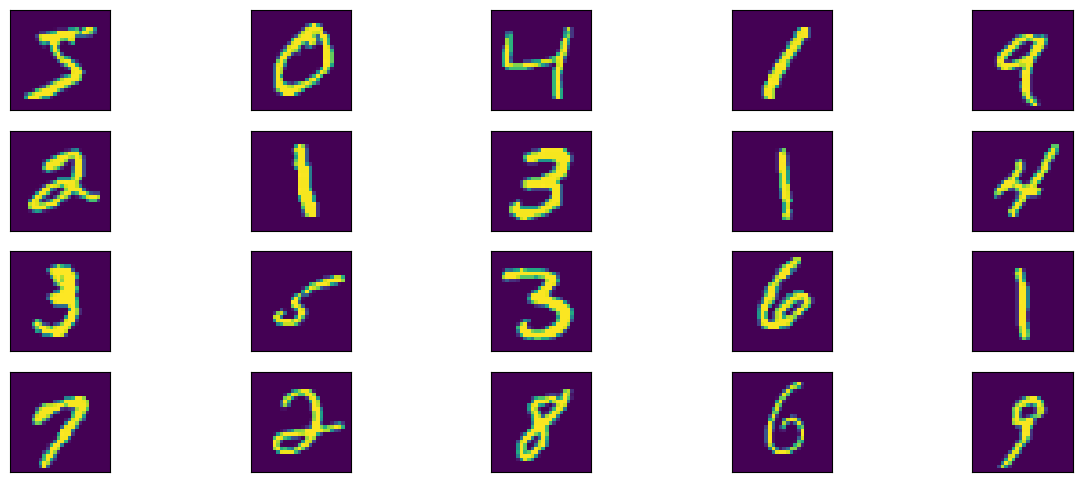

In [5]:
# Creating a new figure for plotting with a specified size (15 inches wide, 6 inches tall)
fig = plt.figure(figsize=(15, 6))

# Looping through the first 20 samples in the training dataset
for i in range(20):
    # Adding a subplot to the figure with a grid of 4 rows and 5 columns
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    # Using np.squeeze to remove the single-dimensional entries from the shape of an array
    ax.imshow(np.squeeze(x_train[i]))

In [6]:
# The variable containing the labels for the training images in the MNIST dataset
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# Preprocess the data by reshaping the images and normalizing pixel values

# The new shape is (number of images, height, width, channels)
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255

# Reshaping the testing images in a similar manner
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Normalizing pixel values to the range [0, 1] by dividing by 255
# This step helps the neural network converge faster during training

In [8]:
# Shape of training data
y_train.shape

(60000,)

In [9]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# CNN

In [11]:
# Building of the CNN model

# Sequential model for building a stack of layers sequentially
model = models.Sequential()

# Convolutional layer with 32 filters, each of size 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Max pooling layer with a 2x2 pool size to reduce spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Another convolutional layer with 64 filters and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Yet another convolutional layer with 64 filters and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten layer to convert 3D output to 1D for dense layers
model.add(layers.Flatten())

# Dense (fully connected) layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (for 10 classes) and softmax activation for multi-class classification
model.add(layers.Dense(10, activation='softmax'))

In [12]:
# Compile the model

model.compile(optimizer='adam',                   # adjusts the model's parameters (weights and biases) iteratively based on the computed gradients of the loss
              loss='categorical_crossentropy',    # quantifies the difference between the predicted values and the actual values
              metrics=['accuracy'])               # Metric to monitor during training: accuracy

# Print a summary of the model architecture, including the number of parameters in each layer
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               

In [13]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/5


938/938 [==============================] - 96s 99ms/step - loss: 0.1713 - accuracy: 0.9469 - val_loss: 0.0473 - val_accuracy: 0.9845
Epoch 2/5
938/938 [==============================] - 74s 79ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0451 - val_accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 89s 94ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0327 - val_accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0320 - val_accuracy: 0.9895
Epoch 5/5
938/938 [==============================] - 73s 78ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0347 - val_accuracy: 0.9890


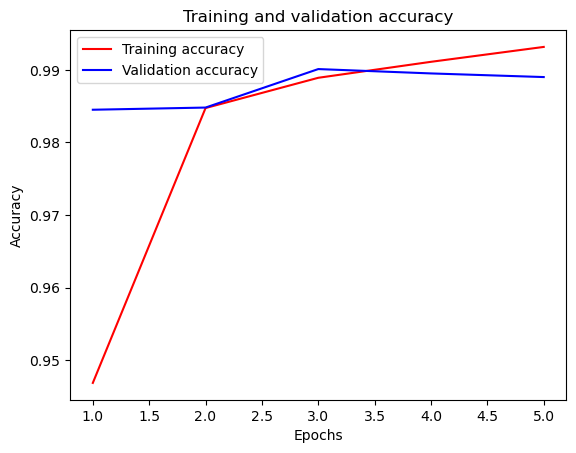

In [14]:
# Plot training and validation accuracy
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

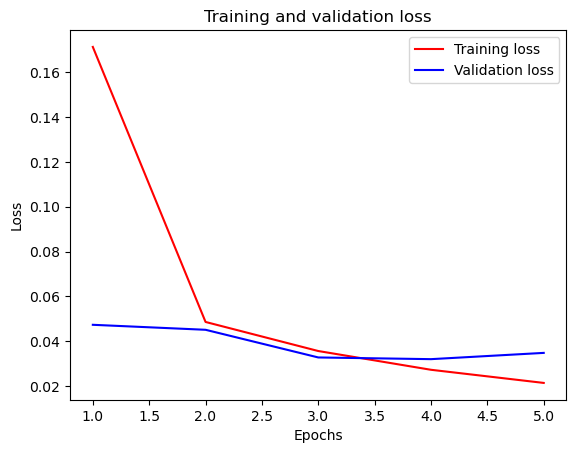

In [15]:
# Plot training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 6s 18ms/step - loss: 0.0347 - accuracy: 0.9890
Test Accuracy: 0.9890000224113464


In [17]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels
mnist_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

313/313 [==============================] - 7s 19ms/step


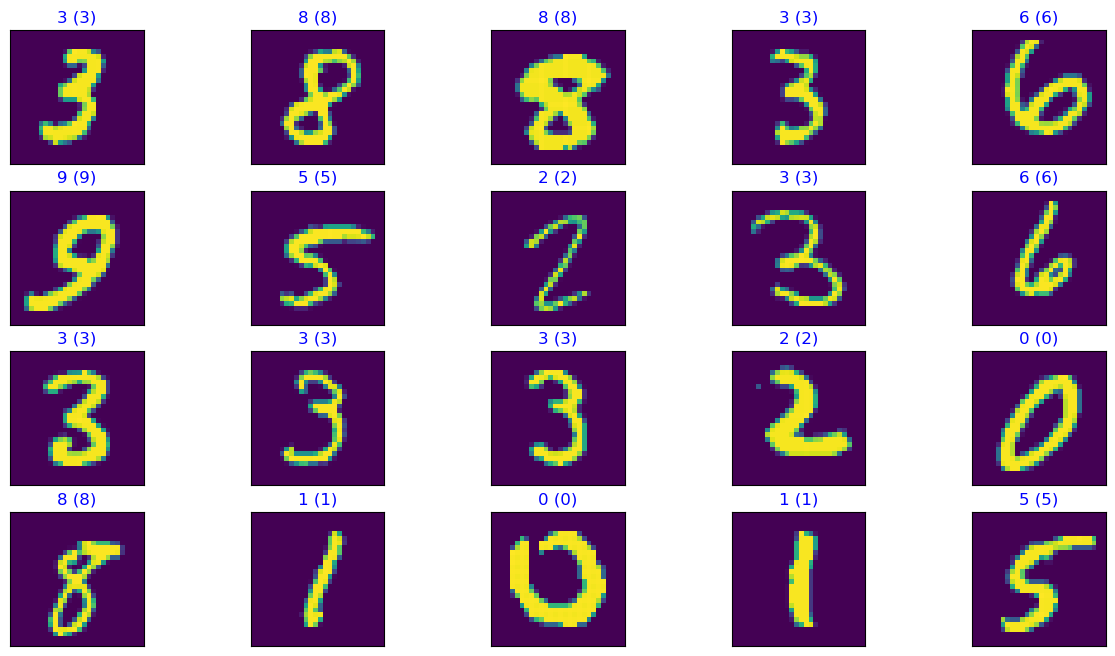

In [18]:
# Plot a random sample of test images, their predicted labels, and ground truth

# Creating a figure for visualizing a grid of images
fig = plt.figure(figsize=(15, 8))

# Looping through a random sample of 20 indices from the test dataset
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    
    # Adding a subplot to the figure with a grid layout
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    
    # Displaying the image in the subplot
    ax.imshow(np.squeeze(x_test[idx]))
    
    # Getting the predicted and true indices from the model's predictions and true labels
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    
    # Setting the title of the subplot with the predicted and true labels
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# SVM

In [19]:
# Loading the MNIST dataset using the load_data() function from TensorFlow.Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
x_train = x_train.reshape(60000, 784)  # Reshape to 2D array with 784 features (28x28 pixels)
x_test = x_test.reshape(10000, 784)

In [21]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [22]:
clf = svm.SVC() 
clf.fit(x_train, y_train)

SVC()

In [23]:
y_pred = clf.predict(x_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792


# KNN

In [25]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test)) #it calculates the proportion of misclassified samples in the test set.

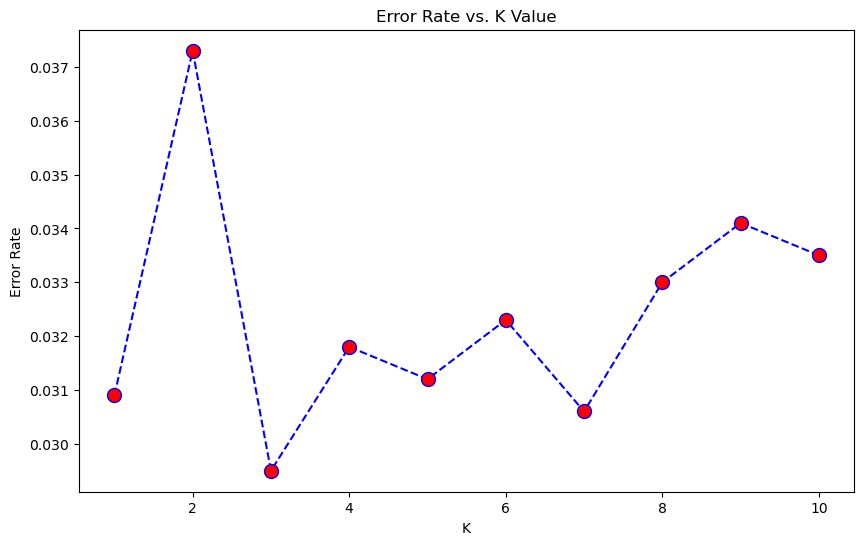

In [26]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [27]:
acc = []

from sklearn import metrics
for i in range(1, 11):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    y_pred = knn2.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

Maximum accuracy:- 0.9705 at K = 2


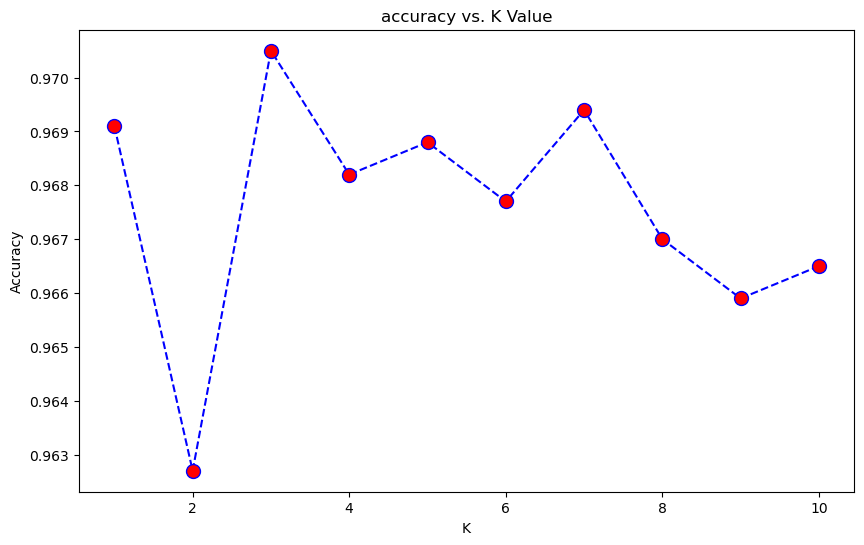

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [29]:
# let's fit the data into KNN model and see how well it performs:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
# Predict 
y_pred = knn1.predict(x_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705


- **Code Overview:**
    
    - **Data Source:** The code utilizes the MNIST dataset, a collection of 70,000 handwritten digits (60,000 for training, 10,000 for testing).
    - **Models:** Three distinct classification models are explored:
        - Convolutional Neural Network (CNN)
        - Support Vector Machine (SVM)
        - K-Nearest Neighbors (KNN)
    - **Preprocessing:** The MNIST images are reshaped and normalized to facilitate model training.
    - **Training and Evaluation:** Each model is trained on the training set and evaluated on the test set to assess performance.


- **Model Performance:**

| Model              |   Accuracy      | Key Points |
|--------------------|-----------------|----------------|
| CNN                |   98.90%        | Demonstrated exceptional accuracy on MNIST|
|--------------------|-----------------|----------------|
SVM (Default)        |	 97.92%	       |Achieved good accuracy with default settings.|
|--------------------|-----------------|----------------|
KNN (k=3)            |	 97.05%	       |Accuracy varied with k-value; k=3 yielded optimal results|
|--------------------|-----------------|----------------|

- **Recommendation:**

    - The **Convolutional Neural Network (CNN) is strongly** recommended for deployment due to its superior **accuracy of 99.97%** on the MNIST dataset. **CNNs are inherently well-suited for image classification tasks** as they can effectively extract and learn meaningful features from images.